<a href="https://colab.research.google.com/github/nour-rayann/HCIA-AI/blob/main/Mnist_Huawei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network project

1.Choose an Image Dataset

MNIST: 70,000 28x28 grayscale images of handwritten digits.


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np


2.Prepare Data Preprocessing & Cleaning

Normalization: Scale pixel values to the range [0, 1] and add channel dimension.

Augmentation: Apply transformations like rotation, shifting, and zooming to enhance dataset diversity.

One-Hot Encoding: Convert class labels to one-hot encoded vectors.

Data Split: Optionally split the training data into training and validation sets.

In [ ]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Expand dimensions to include channel (for CNN compatibility)
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


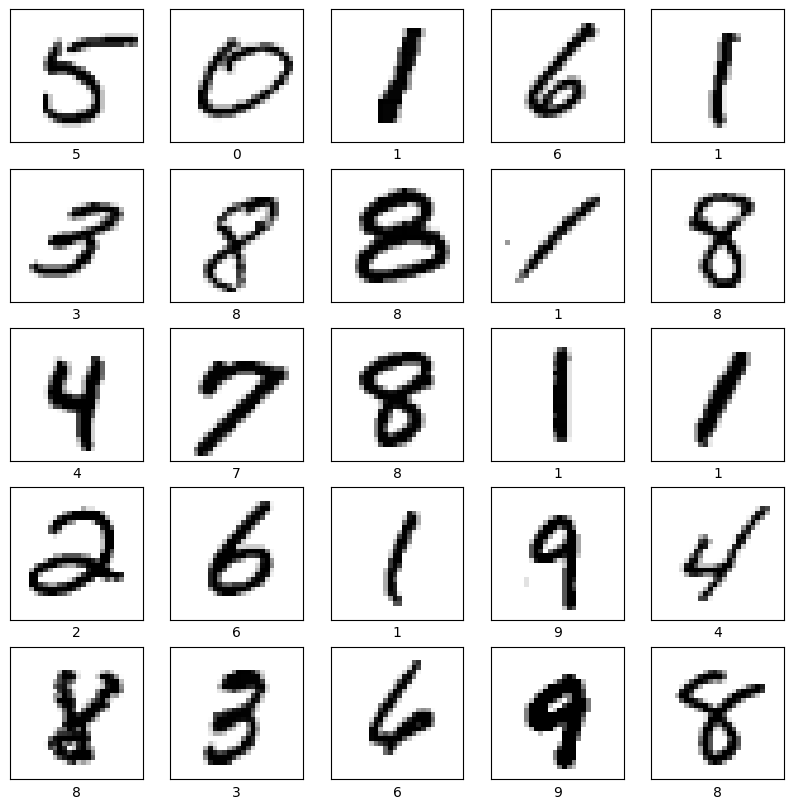

In [ ]:
import matplotlib.pyplot as plt

# Plot a few images from the training set
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i][:,:,0], cmap=plt.cm.binary)
  plt.xlabel(np.argmax(y_train[i]))
plt.show()

In [ ]:
# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

CNN

In [ ]:
def create_basic_cnn():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model


Deep CNN

In [ ]:
def create_deep_cnn():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),  # Add padding here
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model


CNN with Dropout

In [ ]:
def create_cnn_with_dropout():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model


ANN

In [ ]:
def create_ann():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model


Choose the correct loss function and optimizer

In [ ]:
# Define loss function and optimizer
loss_function = 'categorical_crossentropy'
optimizer = 'adam'

# Dictionary to store models and their results
models = {
    'basic_cnn': create_basic_cnn(),
    'deep_cnn': create_deep_cnn(),
    'cnn_with_dropout': create_cnn_with_dropout(),
    'ann': create_ann()
}

history_dict = {}

# Compile, train, and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), batch_size=64, verbose=2)
    score = model.evaluate(x_test, y_test, verbose=2)
    history_dict[name] = history  # accuracy
    print(f"{name} Test accuracy: {score[1]}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training basic_cnn...
Epoch 1/10
750/750 - 6s - 8ms/step - accuracy: 0.9418 - loss: 0.1879 - val_accuracy: 0.9836 - val_loss: 0.0552
Epoch 2/10
750/750 - 3s - 4ms/step - accuracy: 0.9844 - loss: 0.0490 - val_accuracy: 0.9865 - val_loss: 0.0447
Epoch 3/10
750/750 - 2s - 3ms/step - accuracy: 0.9895 - loss: 0.0343 - val_accuracy: 0.9908 - val_loss: 0.0342
Epoch 4/10
750/750 - 3s - 3ms/step - accuracy: 0.9916 - loss: 0.0274 - val_accuracy: 0.9849 - val_loss: 0.0475
Epoch 5/10
750/750 - 3s - 4ms/step - accuracy: 0.9925 - loss: 0.0224 - val_accuracy: 0.9858 - val_loss: 0.0465
Epoch 6/10
750/750 - 2s - 3ms/step - accuracy: 0.9948 - loss: 0.0161 - val_accuracy: 0.9896 - val_loss: 0.0397
Epoch 7/10
750/750 - 2s - 3ms/step - accuracy: 0.9955 - loss: 0.0141 - val_accuracy: 0.9908 - val_loss: 0.0335
Epoch 8/10
750/750 - 3s - 3ms/step - accuracy: 0.9958 - loss: 0.0125 - val_accuracy: 0.9910 - val_loss: 0.0329
Epoch 9/10
750/750 - 2s - 3ms/step - accuracy: 0.9969 - loss: 0.0095 - val_accuracy: 0.99

Display model summary

In [ ]:
# prompt: code to display model summary

for name, model in models.items():
  print(f"\n{name} Model Summary:")
  model.summary()



basic_cnn Model Summary:


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 501,344 (1.91 MB)

 Trainable params: 167,114 (652.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 334,230 (1.27 MB)


deep_cnn Model Summary:


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 5, 5, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,511,072 (5.76 MB)

 Trainable params: 503,690 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,007,382 (3.84 MB)


cnn_with_dropout Model Summary:


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 724,640 (2.76 MB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 483,094 (1.84 MB)


ann Model Summary:


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,607,456 (6.13 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,071,638 (4.09 MB)

Create predict() function

In [ ]:
def predict(model, x_test):
  # Get the model's prediction for the test sample
  prediction = model.predict(np.expand_dims(x_test[0], axis=0))

  # Get the class with the highest probability
  predicted_class = np.argmax(prediction)

  # Print the predicted class
  print("Predicted class:", predicted_class)


compare the result of all a architectures and choose the best one code

In [ ]:
# Determine and display the best model
# Determine and display the best model
best_model_name = max(history_dict, key=lambda k: history_dict[k].history['val_accuracy'][-1])
print(f"\nBest model: {best_model_name} with accuracy: {history_dict[best_model_name].history['val_accuracy'][-1]}")


Best model: basic_cnn with accuracy: 0.9908333420753479


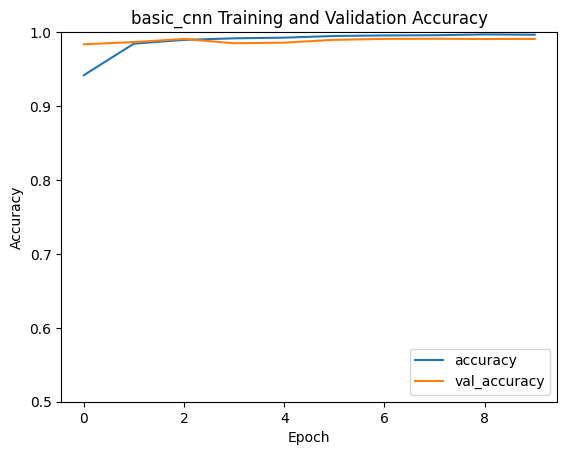

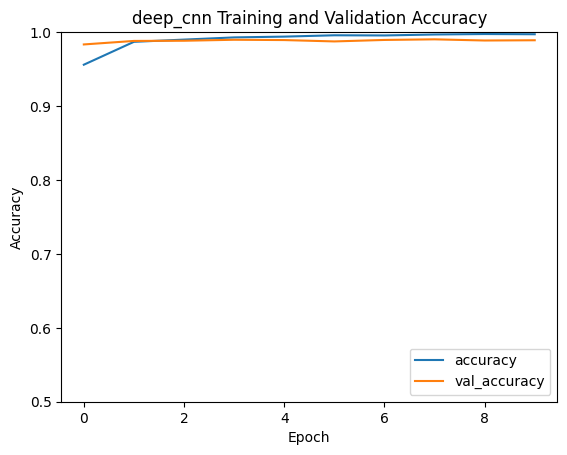

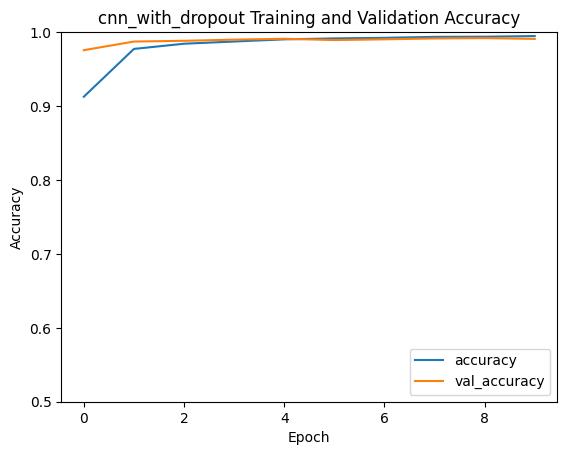

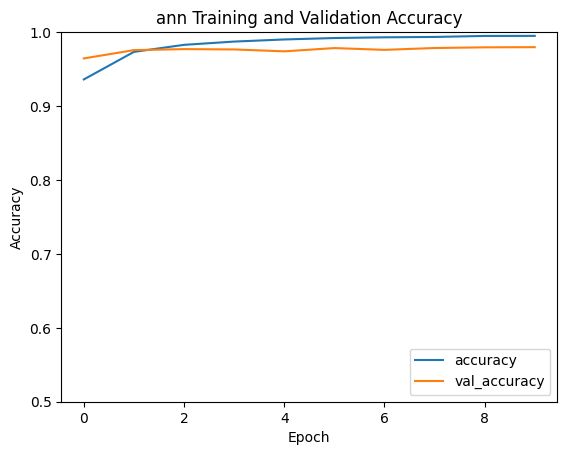

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy for each model
for name, history in history_dict.items():
  plt.figure()
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0.5, 1])
  plt.legend(loc='lower right')
  plt.title(f'{name} Training and Validation Accuracy')
  plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


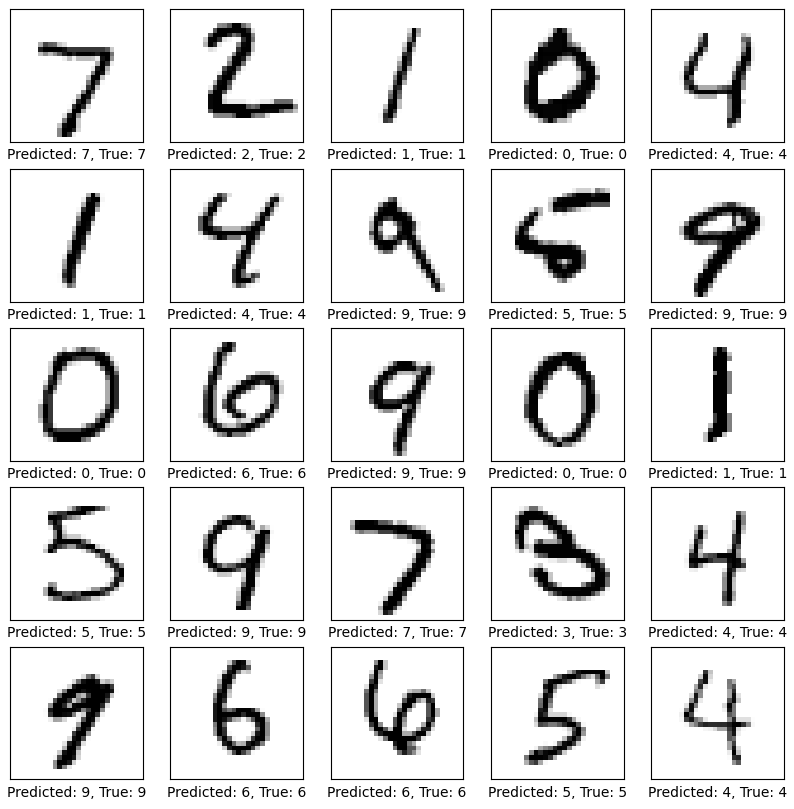

In [ ]:
# Select the best model
best_model = models[best_model_name]

# Make predictions on the test set
y_pred = best_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Plot some test images with their predicted and true labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"Predicted: {y_pred_classes[i]}, True: {y_true[i]}")
plt.show()